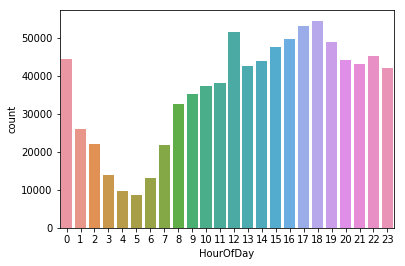

In [224]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.columns

df_train.drop(columns = "Id",axis = 1 ,inplace = True)

df_test.drop(columns = "Id", axis = 1 , inplace = True)

df_train['Category'].unique()

df_train[df_train['Category'] == 'SEX OFFENSES FORCIBLE' ]['Resolution'].unique()

df_train.drop(columns = 'Descript',axis=1, inplace = True)
df_test.drop(columns = 'Descript' , axis = 1, inplace = True)

df_train.columns

df_train['Dates'].head()

df_train['Dates'] = pd.to_datetime(df_train['Dates'])
df_test['Dates'] = pd.to_datetime(df_train['Dates'])

df_train['Year'] = df_train['Dates'].dt.year
df_train['Month'] = df_train['Dates'].dt.month
df_train['HourOfDay'] = df_train['Dates'].dt.hour

df_train.drop(columns = 'Dates', axis =1 , inplace = True)


df_test['Year'] = df_test['Dates'].dt.year
df_test['Month'] = df_test['Dates'].dt.month
df_test['HourOfDay'] = df_test['Dates'].dt.hour

df_test.drop(columns = 'Dates', axis =1 , inplace = True)

sns.countplot(df_train['HourOfDay'])

df_train['Month']=df_train['Month'].apply(lambda x : 'MonthLow' if x== 12 else ('MonthMed' if x in (2,6,7,8,9,11) else 'MonthHigh'))


df_train['HourofDay']=df_train['HourOfDay'].apply(lambda x : 'Morning' if (x >= 1) & (x <=7) else ('Day' if x > 7 & x <=18 else 'Evening'))

df_train.head()

df_test['Month']=df_test['Month'].apply(lambda x : 'MonthLow' if x== 12 else ('MonthMed' if x in (2,6,7,8,9,11) else 'MonthHigh'))


df_test['HourofDay']=df_test['HourOfDay'].apply(lambda x : 'Morning' if (x >= 1) & (x <=7) else ('Day' if x > 7 & x <=18 else 'Evening'))

week_dict={
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
df_train['DayOfWeek']=df_train['DayOfWeek'].replace(week_dict)
df_test['DayOfWeek']=df_test['DayOfWeek'].replace(week_dict)

df_train.head()

df_train['Intersection']=df_train['Address'].apply(lambda x : 1 if '/' in x else 0)

df_train['Block']=df_train['Address'].apply(lambda x : 1 if 'Block' in x else 0)

df_train['StreetSuffix']=df_train['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 

df_train.head()


df_test['Intersection']=df_test['Address'].apply(lambda x : 1 if '/' in x else 0)

df_test['Block']=df_test['Address'].apply(lambda x : 1 if 'Block' in x else 0)

df_test['StreetSuffix']=df_test['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 

df_train=df_train.drop(['Address'],axis=1)
df_test=df_test.drop(['Address'],axis=1)

df_train.head()

df_train['Y']=df_train['Y'].apply(lambda x : x if 37.82 > x else 37.82 )

df_train['X']=df_train['X'].apply(lambda x : x if -122.3 > x else -122.3 )

df_test['Y']=df_train['Y'].apply(lambda x : x if 37.82 > x else 37.82 )

df_test['X']=df_train['X'].apply(lambda x : x if -122.3 > x else -122.3 )

In [225]:
df_train.head()


,Category,DayOfWeek,PdDistrict,Resolution,X,Y,Year,Month,HourOfDay,HourofDay,Intersection,Block,StreetSuffix
0,SEX OFFENSES FORCIBLE,5,MISSION,NONE,-122.419331,37.762264,2013,MonthMed,17,Day,0,1,ST
1,LIQUOR LAWS,4,SOUTHERN,"ARREST, BOOKED",-122.411340,37.781271,2004,MonthMed,2,Morning,0,1,ST
2,FRAUD,3,SOUTHERN,NONE,-122.403405,37.775421,2007,MonthMed,0,Evening,0,1,ST
3,ROBBERY,4,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,-122.404715,37.730161,2007,MonthLow,18,Day,0,1,AV
4,OTHER OFFENSES,7,SOUTHERN,"ARREST, BOOKED",-122.405239,37.785265,2012,MonthMed,17,Day,1,0,ST


In [226]:
df_train['Category'].value_counts().head(10)

LARCENY/THEFT     172952
OTHER OFFENSES    124736
NON-CRIMINAL       91266
ASSAULT            75987
DRUG/NARCOTIC      53365
VEHICLE THEFT      53146
VANDALISM          44183
WARRANTS           41729
BURGLARY           36326
SUSPICIOUS OCC     31051
Name: Category, dtype: int64

In [227]:
df_train.columns

Index(['Category', 'DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y', 'Year',
       'Month', 'HourOfDay', 'HourofDay', 'Intersection', 'Block',
       'StreetSuffix'],
      dtype='object')

In [228]:
df_train.shape

(867873, 13)

In [229]:
df_train['PartOfDay']=df_train['HourOfDay'].apply(lambda x : 'Morning' if (x >= 5) & (x <=10) else ('Day' if x > 10 & x <=18 else 'Evening'))


df_test['PartOfDay']=df_test['HourOfDay'].apply(lambda x : 'Morning' if (x >= 5) & (x <=10) else ('Day' if x > 10 & x <=18 else 'Evening'))


In [230]:
df_train.drop(columns = 'HourofDay',axis=1, inplace = True)
df_test.drop(columns = 'HourofDay' , axis = 1, inplace = True)

In [231]:
df_train.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,Year,Month,HourOfDay,Intersection,Block,StreetSuffix,PartOfDay
0,SEX OFFENSES FORCIBLE,5,MISSION,NONE,-122.419331,37.762264,2013,MonthMed,17,0,1,ST,Day
1,LIQUOR LAWS,4,SOUTHERN,"ARREST, BOOKED",-122.411340,37.781271,2004,MonthMed,2,0,1,ST,Evening
2,FRAUD,3,SOUTHERN,NONE,-122.403405,37.775421,2007,MonthMed,0,0,1,ST,Evening
3,ROBBERY,4,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,-122.404715,37.730161,2007,MonthLow,18,0,1,AV,Day
4,OTHER OFFENSES,7,SOUTHERN,"ARREST, BOOKED",-122.405239,37.785265,2012,MonthMed,17,1,0,ST,Day


In [232]:
df_train.loc[0]

Category        SEX OFFENSES FORCIBLE
DayOfWeek                           5
PdDistrict                    MISSION
Resolution                       NONE
X                            -122.419
Y                             37.7623
Year                             2013
Month                        MonthMed
HourOfDay                          17
Intersection                        0
Block                               1
StreetSuffix                       ST
PartOfDay                         Day
Name: 0, dtype: object

In [233]:
df_train['WeekEnd']=df_train['DayOfWeek'].apply(lambda x : '1' if (x >= 5) else '0')


In [234]:
df_test['WeekEnd']=df_train['DayOfWeek'].apply(lambda x : '1' if (x >= 5) else '0')


In [235]:
df_train.drop(columns = 'Resolution',axis=1, inplace = True)
df_test.drop(columns = 'Resolution' , axis = 1, inplace = True)

In [293]:
Category_train = pd.read_csv('train.csv')['Category']

In [294]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Cat = le.fit_transform(Category_train)

In [295]:
le.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PROSTITUTION',
       'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
       'SEX OFFENSES FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [289]:
Category_train

array([27, 17, 13, ..., 16, 21, 16], dtype=int64)

In [238]:
Category_train = Cat
le.inverse_transform([0, 0, 1, 2])

array([0, 0, 1, 2], dtype=int64)

In [239]:
df_train.drop(columns = 'Category',axis=1, inplace = True)

In [240]:
df_train = pd.get_dummies(df_train)

In [241]:
df_test = pd.get_dummies(df_test)

In [242]:
df_test.shape

(10000, 40)

In [243]:
df_train.shape

(867873, 43)

In [244]:
df_test.columns

Index(['DayOfWeek', 'X', 'Y', 'Year', 'HourOfDay', 'Intersection', 'Block',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'Month_MonthHigh', 'Month_MonthLow',
       'Month_MonthMed', 'StreetSuffix_0', 'StreetSuffix_AL',
       'StreetSuffix_AV', 'StreetSuffix_BL', 'StreetSuffix_CR',
       'StreetSuffix_CT', 'StreetSuffix_DR', 'StreetSuffix_HY',
       'StreetSuffix_LN', 'StreetSuffix_PL', 'StreetSuffix_PZ',
       'StreetSuffix_RD', 'StreetSuffix_ST', 'StreetSuffix_TR',
       'StreetSuffix_WY', 'PartOfDay_Day', 'PartOfDay_Evening',
       'PartOfDay_Morning', 'WeekEnd_0', 'WeekEnd_1'],
      dtype='object')

In [245]:
df_train.columns

Index(['DayOfWeek', 'X', 'Y', 'Year', 'HourOfDay', 'Intersection', 'Block',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'Month_MonthHigh', 'Month_MonthLow',
       'Month_MonthMed', 'StreetSuffix_0', 'StreetSuffix_AL',
       'StreetSuffix_AV', 'StreetSuffix_BL', 'StreetSuffix_CR',
       'StreetSuffix_CT', 'StreetSuffix_DR', 'StreetSuffix_EX',
       'StreetSuffix_HY', 'StreetSuffix_LN', 'StreetSuffix_PL',
       'StreetSuffix_PZ', 'StreetSuffix_RD', 'StreetSuffix_RW',
       'StreetSuffix_ST', 'StreetSuffix_TR', 'StreetSuffix_WK',
       'StreetSuffix_WY', 'PartOfDay_Day', 'PartOfDay_Evening',
       'PartOfDay_Morning', 'WeekEnd_0', 'WeekEnd_1'],
      dtype='object')

In [246]:
df_train.columns[36]

'StreetSuffix_WK'

In [247]:
df_test.insert(loc=36,column='StreetSuffix_WK',value = 0)

In [74]:
#from sklearn.cross_validation import train_test_split

In [72]:
X = df_train

In [182]:
#X_train,X_test,Y_train,Y_test = train_test_split(X, Category_train ,test_size=0.2 , random_state=101)

In [76]:
#X_train.shape

(694298, 43)

In [77]:
#Y_train.shape

(694298,)

In [78]:
#X_test.shape

(173575, 43)

In [80]:
#Y_test.shape

(173575,)

In [248]:
X = df_train

In [249]:
Y = Category_train

In [311]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [251]:
XGB = GradientBoostingClassifier()

In [252]:
XGB.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [267]:
X.columns

Index(['DayOfWeek', 'X', 'Y', 'Year', 'HourOfDay', 'Intersection', 'Block',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'Month_MonthHigh', 'Month_MonthLow',
       'Month_MonthMed', 'StreetSuffix_0', 'StreetSuffix_AL',
       'StreetSuffix_AV', 'StreetSuffix_BL', 'StreetSuffix_CR',
       'StreetSuffix_CT', 'StreetSuffix_DR', 'StreetSuffix_EX',
       'StreetSuffix_HY', 'StreetSuffix_LN', 'StreetSuffix_PL',
       'StreetSuffix_PZ', 'StreetSuffix_RD', 'StreetSuffix_RW',
       'StreetSuffix_ST', 'StreetSuffix_TR', 'StreetSuffix_WK',
       'StreetSuffix_WY', 'PartOfDay_Day', 'PartOfDay_Evening',
       'PartOfDay_Morning', 'WeekEnd_0', 'WeekEnd_1'],
      dtype='object')

In [266]:
X

Index(['StreetSuffix_EX', 'StreetSuffix_RW'], dtype='object')

In [272]:
X.columns[27]

'StreetSuffix_EX'

In [273]:
df_test.insert(loc=27,column='StreetSuffix_EX',value = 0)

In [275]:
Y_pred = XGB.predict_proba(X_test)

In [274]:
X_test = df_test

In [ ]:
Y_

In [254]:
log_loss(Y_test,Y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 173575]

In [105]:
df_train.shape

(867873, 43)

In [106]:
df_test.shape

(10000, 43)

In [296]:
X = df_train

In [297]:
Y = Category_train

In [300]:
XGB.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [301]:
Y


0         SEX OFFENSES FORCIBLE
1                   LIQUOR LAWS
2                         FRAUD
3                       ROBBERY
4                OTHER OFFENSES
5                      WARRANTS
6                      BURGLARY
7                SUSPICIOUS OCC
8                OTHER OFFENSES
9                 DRUG/NARCOTIC
10                LARCENY/THEFT
11               OTHER OFFENSES
12                    VANDALISM
13                      ASSAULT
14                DRUG/NARCOTIC
15                LARCENY/THEFT
16                DRUG/NARCOTIC
17                VEHICLE THEFT
18               MISSING PERSON
19               OTHER OFFENSES
20                 NON-CRIMINAL
21                      ASSAULT
22                  DRUNKENNESS
23                 NON-CRIMINAL
24               OTHER OFFENSES
25                     WARRANTS
26                LARCENY/THEFT
27                      ROBBERY
28                VEHICLE THEFT
29                LARCENY/THEFT
                  ...          
867843  

In [302]:
X_test = df_test

In [303]:
Y_pred = XGB.predict_proba(X_test)

In [304]:
Y_pred.shape

(10000, 36)

In [306]:
le.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PROSTITUTION',
       'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
       'SEX OFFENSES FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [307]:
df = pd.read_csv("test.csv")
Idtest = df['Id']
submit = pd.DataFrame(Y_pred,columns = le.classes_)
submit['Id'] = Idtest

In [310]:
submit.to_csv('dipta_result_XGB_FULL.csv', index=False)

In [308]:
submit.shape

(10000, 37)

In [284]:
submit = pd.DataFrame(Y_pred,columns = le.classes_)

In [309]:
submit.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,Id
0,0.000573,0.080195,9.528425e-05,0.000244,0.026345,0.002280,0.000955,0.146336,0.003934,4.601931e-04,...,0.003464,0.004381,3.764105e-04,0.030925,0.008443,0.243373,0.018838,0.061651,0.007710,349598
1,0.003029,0.234093,4.665454e-04,0.000174,0.048528,0.006917,0.015419,0.049427,0.023545,7.346192e-04,...,0.011911,0.003676,8.703528e-04,0.030481,0.008054,0.059256,0.035115,0.073496,0.013586,766313
2,0.000764,0.055815,1.858810e-04,0.000102,0.001129,0.002228,0.007779,0.018562,0.007907,2.451452e-04,...,0.007322,0.002665,9.781412e-05,0.014557,0.000959,0.284063,0.015463,0.043066,0.005732,169887
3,0.000002,0.000202,3.675434e-07,0.000001,0.000016,0.000031,0.000012,0.000229,0.000012,7.932013e-07,...,0.000006,0.000012,4.872506e-07,0.000087,0.000007,0.001544,0.000283,0.000162,0.000045,594704
4,0.000312,0.034517,6.316795e-05,0.000093,0.003995,0.001168,0.007487,0.028424,0.004872,1.415019e-04,...,0.001424,0.003295,8.013639e-05,0.017771,0.000805,0.267589,0.017549,0.038485,0.003870,47900


In [286]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)